In [51]:
import numpy as np # Linear algebra
import pandas as pd # Data processing CSV 
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
import cv2

# Neural networks
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [52]:
import zipfile
import os

# Ruta del archivo ZIP (asegúrate de que sea la correcta)
zip_path = "/Users/diego/OneDrive/Documentos/Materias UDLAP/Python/Artificial_intelligence/CNN/archive.zip"

# Folder where the files will be extracted
extract_path = "/Users/diego/OneDrive/Documentos/Materias UDLAP/Python/Artificial_intelligence/CNN/extracted_data"

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

# Verify content
print("Extracted files:", os.listdir(extract_path))

Extraction complete!
Extracted files: ['test', 'train']


In [53]:
img_size = 48 # Original size of the pictures (48x48)
train_dir = "/Users/diego/OneDrive/Documentos/Materias UDLAP/Python/Artificial_intelligence/CNN/extracted_data/train"
test_dir = "/Users/diego/OneDrive/Documentos/Materias UDLAP/Python/Artificial_intelligence/CNN/extracted_data/test"

In [54]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory( # 80% of the total dataset
    train_dir,
    image_size = (img_size, img_size),
    batch_size = 32 # Just load 32,  in each iteration the NN will just process 32 images, that helps the RAM
)

Found 28709 files belonging to 7 classes.


In [55]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory( # 20% of the total datset
    test_dir,
    image_size = (img_size, img_size),
    batch_size = 32 # Just load 32, in each iteration the NN will just process 32 images, that helps the RAM
)

Found 7178 files belonging to 7 classes.


In [56]:
# Verify clases (7)
class_names = train_dataset.class_names
print("Clases detectadas:", class_names)

Clases detectadas: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Print some images to visualize the dataset

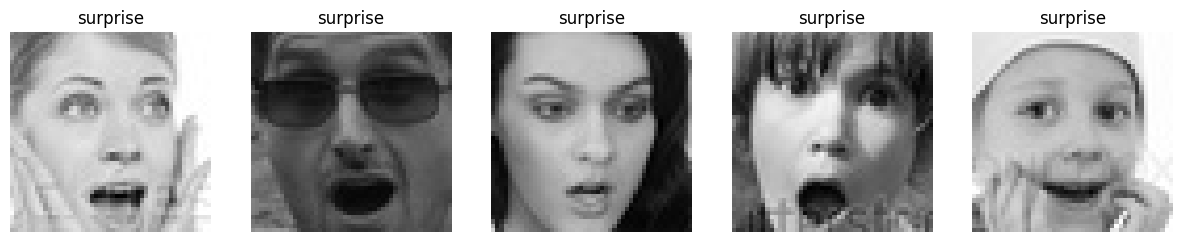

In [57]:
# Get list of all subdirectories (emotion categories)
categories = os.listdir(train_dir)
category = categories[6]  # Select a category (7 = surprise)

# Get list of image files inside that category
image_files = os.listdir(os.path.join(train_dir, category)) # Names of the files

# Plot 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, img_name in enumerate(image_files[20:25]):  # Take 5 images
    img_path = os.path.join(train_dir, category, img_name)  # Full path to image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    axes[i].imshow(img)
    axes[i].set_title(category)  # Show category name
    axes[i].axis("off")

plt.show()

### Convolutional Neural Network (CNN)

In [58]:
# Create the model
model = models.Sequential([
    # Convolutional Layer 1 (32 filters, it detects basic features)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2 (64 filters, it extracts more complex features)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3 (128 filters it detects complex features)
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening and dense Layers
    layers.Flatten(),
    layers.Dropout(0.3), # Helps prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Avoids overfitting
    layers.Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Define the test data generator (without augmentation)
test_data_aug = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Change the images (here we define how we make those changes)
train_data_aug = ImageDataGenerator(
    rotation_range = 180,  # Randomly rotate the image by up to 180 degrees
    width_shift_range = 0.2,  # Randomly shift the image horizontally by up to 20% of the total width
    height_shift_range = 0.2,  # Randomly shift the image vertically by up to 20% of the total height
    horizontal_flip = True,  # Randomly flip the image horizontally
    rescale = 1./255,  # Normalize the pixel values to the range [0, 1]
    validation_split = 0.2  # Reserve 20% of data for validation
)


# Apply data augmentation to the training data
train_generator = train_data_aug.flow_from_directory(
    train_dir,  # Directory with your training images
    target_size=(img_size, img_size),  # Resize images to 48x48 (or any other size your model accepts)
    batch_size=32,  # Number of images per batch
    color_mode='grayscale',  # Convert images to grayscale
    class_mode='categorical',  # Since you have multiple categories (emotions)
    subset='training',  # Use the training subset
    shuffle=False
)

# Apply the validation split for validation data
validation_generator = train_data_aug.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation',  # Use the validation subset
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


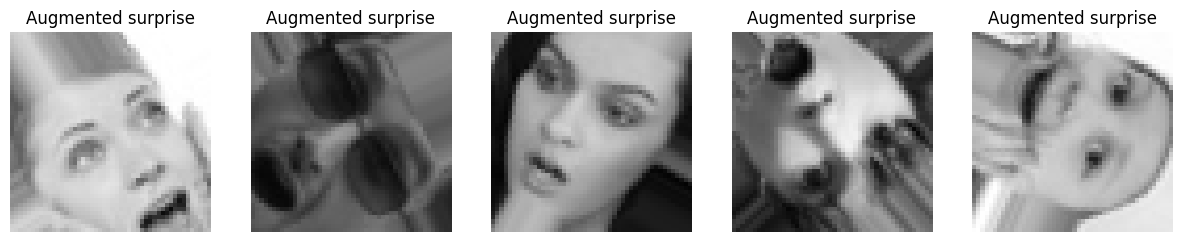

In [60]:
# Visualize some augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_name in enumerate(image_files[20:25]):  # Take 5 images
    img_path = os.path.join(train_dir, category, img_name)  # Full path to image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Apply augmentation using ImageDataGenerator
    img = train_data_aug.random_transform(img)  # Random augmentation
    axes[i].imshow(img)
    axes[i].set_title(f'Augmented {category}')  # Show category name
    axes[i].axis("off")

plt.show()

## Train the model

In [61]:
# Train the model using the augmented data
history = model.fit(
    train_generator,  # Training data generator
    epochs=15,  # Number of epochs
    validation_data=validation_generator  # Validation data generator
)

Epoch 1/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 236s 326ms/step - accuracy: 0.2082 - loss: 1.8892 - val_accuracy: 0.2513 - val_loss: 1.8190
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.2353 - loss: 1.8423 - val_accuracy: 0.2513 - val_loss: 1.8161
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.2463 - loss: 1.8439 - val_accuracy: 0.2571 - val_loss: 1.8046
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.2608 - loss: 1.8097 - val_accuracy: 0.2527 - val_loss: 1.8047
Epoch 5/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.2603 - loss: 1.8126 - val_accuracy: 0.2500 - val_loss: 1.8054
Epoch 6/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.2566 - loss: 1.8080 - val_accuracy: 0.2513 - val_loss: 1.7900
Epoch 7/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.2389 - loss: 1.8100 - val_accuracy: 0.2513 - val_loss: 1.7914
Epoch 8/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.2318 - loss: 1.8112 

In [66]:
# Inmediately save the model
model.save('model_optimal.h5')  # Save the entire model to 'model_optimal.h5'
model.save_weights('model_weights.weights.h5')  # Save weights in HDF5 format with the correct extension
#model.save_weights('model_weights.keras')  # Save weights using the native Keras format

In [ ]:
# Evaluate the model on the test data

# Define the test data generator (no augmentation, only rescaling)
test_data_aug = ImageDataGenerator(rescale=1./255)  # Rescale test data

# Create the test generator (obtain the test images)
test_generator = test_data_aug.flow_from_directory(
    test_dir,  # Directory with your test images
    target_size=(48, 48),  # Resize images to 48x48 (as expected by the model)
    batch_size=32,  # Number of images per batch
    color_mode='grayscale',  # Convert images to grayscale
    class_mode='categorical',  # Multiple categories (emotions)
    shuffle=False  # Do not shuffle test data
)

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"\nTest Accuracy: {test_acc:.2%}")

Found 7178 images belonging to 7 classes.
225/225 - 54s - 241ms/step - accuracy: 0.2492 - loss: 1.7908

Test Accuracy: 24.92%


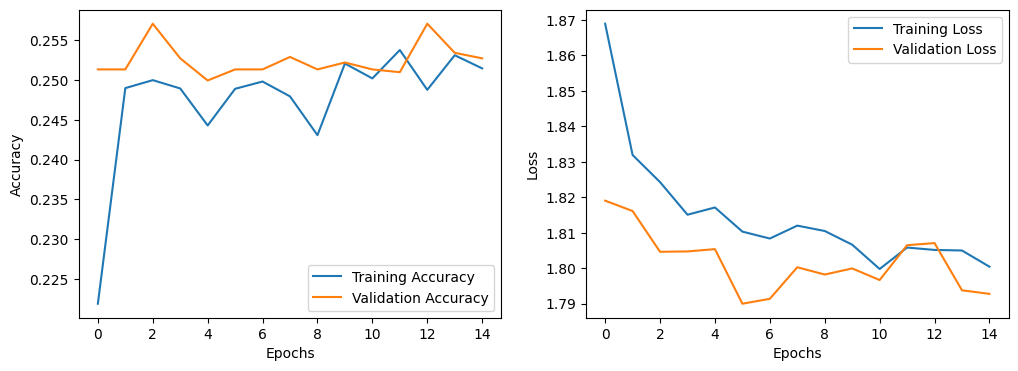

In [68]:
# Visualize metrics (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


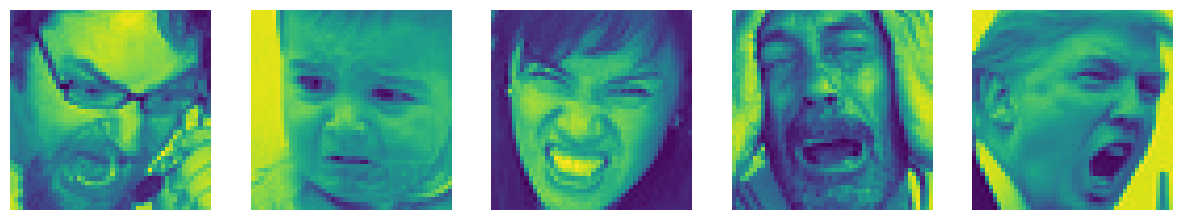

In [79]:
# Make predictions on the test data
predictions = model.predict(test_generator)
plt.figure(figsize=(15, 5))

for i in range(5):
    plt.subplot(1, 5, i+1) # Creates a subplot
    plt.imshow(test_generator[i][0][i])  # Get the image from the test batch
    #plt.title(f"Real: {class_names[test_generator[i][0][i]]}\nPred: {class_names[np.argmax(predictions[i])]}")  # Show true label and prediction
    plt.axis('off')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix # Create confussion metrics
# Compute the confussion matrix
confusion_matrix = confusion_matrix(test_generator.class)